In [13]:
import numpy as np 
import PyPDF2 as pypdf
import sys
import os
from binascii import b2a_hex

In [2]:
pdf_file_obj = open('Automobile-Loss-Notice.pdf', 'rb')
pdf_file_reader = pypdf.PdfFileReader(pdf_file_obj)

In [3]:
no_of_pages = pdf_file_reader.numPages

In [4]:
pdf_text = {}
for i in range(no_of_pages):
    pdf_text[i] = pdf_file_reader.getPage(i).extractText()
pdf_file_obj.close()
pdf_text[0]

"CIVIL UNION (if applicable)MARITAL STATUS /PHONE #CELLHOMEBUSPRIMARYPHONE #SECONDARYCELLHOMEBUSSECONDARY E-MAIL ADDRESS:PRIMARY E-MAIL ADDRESS:NAME OF INSURED (First, Middle, Last)INSURED'S MAILING ADDRESSFEIN (if applicable)DATE OF BIRTHINSUREDFAX(A/C, No):AGENCYNAME:CONTACT(A/C, No, Ext):PHONESUBCODE:CODE:AGENCY CUSTOMER ID:ADDRESS:E-MAILPHONE #CELLHOMEBUSPRIMARYPHONE #SECONDARYCELLHOMEBUSSECONDARY E-MAIL ADDRESS:PRIMARY E-MAIL ADDRESS:NAME OF CONTACT (First, Middle, Last)CONTACT'S MAILING ADDRESSCONTACTCONTACT INSUREDWHEN TO CONTACTDESCRIBE LOCATION OF LOSS IF NOT AT SPECIFIC STREET ADDRESS:REPORT NUMBERPOLICE OR FIRE DEPARTMENT CONTACTEDCOUNTRY:CITY, STATE, ZIP:STREET:LOCATION OF LOSSDESCRIPTION OF ACCIDENT (ACORD 101, Additional Remarks Schedule, may be attached if more space is required)LOSS(Check if same as owner)PHONE #CELLHOMEBUSPRIMARYPHONE #SECONDARYCELLHOMEBUSSECONDARY E-MAIL ADDRESS:PRIMARY E-MAIL ADDRESS:DRIVER'S NAME AND ADDRESS(Check if same as insured)PHONE #CELLHOMEB

In [5]:
import pdfquery

pdf = pdfquery.PDFQuery('Automobile-Loss-Notice.pdf')
pdf.load()
pdf._pages

[<PDFPage: Resources={'Font': {'F1': <PDFObjRef:27>, 'F2': <PDFObjRef:28>, 'PTKFnt1047780322': <PDFObjRef:30>}, 'ProcSet': [/'PDF', /'Text', /'ImageB'], 'XObject': {'Img1': <PDFObjRef:25>}}, MediaBox=[0, 0, 612, 792]>,
 <PDFPage: Resources={'Font': {'F1': <PDFObjRef:27>}, 'ProcSet': [/'PDF', /'Text', /'ImageB']}, MediaBox=[0, 0, 612, 792]>,
 <PDFPage: Resources={'Font': {'F1': <PDFObjRef:27>, 'F2': <PDFObjRef:28>}, 'ProcSet': [/'PDF', /'Text', /'ImageB']}, MediaBox=[0, 0, 612, 792]>,
 <PDFPage: Resources={'Font': {'F1': <PDFObjRef:27>, 'F2': <PDFObjRef:28>}, 'ProcSet': [/'PDF', /'Text', /'ImageB']}, MediaBox=[0, 0, 612, 792]>]

In [6]:
from lxml import etree
with open('xmltree.xml','wb') as f:
    f.write(etree.tostring(pdf.tree, pretty_print=True))

In [7]:
from pdfminer.layout import LAParams
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.pdfpage import PDFPage
from pdfminer.layout import LTTextBoxHorizontal, LTImage, LTFigure
document = open('Automobile-Loss-Notice.pdf', 'rb')
#Create resource manager
rsrcmgr = PDFResourceManager()
# Set parameters for analysis.
laparams = LAParams()
# Create a PDF page aggregator object.
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
for page in PDFPage.get_pages(document):
    interpreter.process_page(page)
    # receive the LTPage object for the page.
    layout = device.get_result()
    for element in layout:
        if isinstance(element, LTTextBoxHorizontal):
            print(element.get_text())


AGENCY

INSURED LOCATION CODE

DATE OF LOSS AND TIME

AUTOMOBILE LOSS NOTICE

DATE (MM/DD/YYYY)

AM

PM

NAIC CODE

CONTACT
NAME:
PHONE
(A/C, No, Ext):
FAX
(A/C, No):
E-MAIL
ADDRESS:

CODE:

AGENCY CUSTOMER ID:
INSURED
NAME OF INSURED (First, Middle, Last)

SUBCODE:

CARRIER

POLICY NUMBER

LINE OF BUSINESS

INSURED'S MAILING ADDRESS

DATE OF BIRTH

FEIN (if applicable)

MARITAL STATUS /

CIVIL UNION (if applicable)

PRIMARY
PHONE #

HOME

BUS

CELL

SECONDARY
PHONE #

HOME

BUS

CELL

PRIMARY E-MAIL ADDRESS:

CONTACT
NAME OF CONTACT (First, Middle, Last)

CONTACT INSURED

PRIMARY
PHONE #

HOME

BUS

CELL

SECONDARY
PHONE #

HOME

BUS

CELL

WHEN TO CONTACT

LOSS
LOCATION OF LOSS

STREET:

CITY, STATE, ZIP:

COUNTRY:

SECONDARY E-MAIL ADDRESS:

CONTACT'S MAILING ADDRESS

PRIMARY E-MAIL ADDRESS:

SECONDARY E-MAIL ADDRESS:

POLICE OR FIRE DEPARTMENT CONTACTED

REPORT NUMBER

DESCRIBE LOCATION OF LOSS IF NOT AT SPECIFIC STREET ADDRESS:

DESCRIPTION OF ACCIDENT (ACORD 101, Additional Remar

In [50]:
document = open('dummy-filled-claim-form.pdf', 'rb')
#Create resource manager
rsrcmgr = PDFResourceManager()
# Set parameters for analysis.
laparams = LAParams()
# Create a PDF page aggregator object.
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
for page in PDFPage.get_pages(document):
    interpreter.process_page(page)
    # receive the LTPage object for the page.
    layout = device.get_result()
    for element in layout:
        print('inside element')
        if isinstance(element, LTTextBoxHorizontal):
            print('LTtextBox')
            print(element, element.get_text())
        elif isinstance(element, LTFigure):
            print('Image Found')
        else:
            print(element)

inside element
Image Found
inside element
Image Found
inside element
Image Found
inside element
Image Found
inside element
Image Found
inside element
Image Found
inside element
Image Found
inside element
Image Found


In [55]:
import tempfile
from pdf2image import convert_from_path, convert_from_bytes

with tempfile.TemporaryDirectory() as path:
    images_from_path = convert_from_path('dummy-filled-claim-form.pdf', output_folder=path)
    # Do something here
    print(images_from_path)

[]


In [81]:
images = convert_from_path('dummy-filled-claim-form.pdf', fmt='jpeg')
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1671x2386 at 0x17791B9EE88>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1672x2388 at 0x17791B98F48>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1684x2391 at 0x17791B98BC8>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1682x2383 at 0x17791B98888>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1674x2383 at 0x17791B98A48>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1667x2387 at 0x17791B98B08>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1670x2384 at 0x17791B98D48>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1682x2392 at 0x17791B98C08>]

In [76]:
images = [np.array(image) for image in images]

In [87]:
for i, image in enumerate(images):
    image.save('image{}.jpg'.format(i))

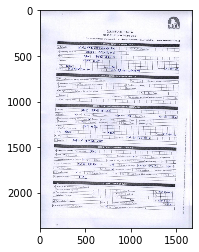

In [80]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(images[0])

In [93]:
from PIL import Image
import PIL.Image

from pytesseract import image_to_string
import pytesseract

pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR/tesseract'
TESSDATA_PREFIX = 'C:\Program Files\Tesseract-OCR'
output = pytesseract.image_to_string(images[0].convert("RGB"), lang='eng')
print(output)

DHF L|

GENERAL INSURANCE

CLAIM FORM - PARTA
TO BE FILLED IN BY THE INSURED
The issue of this Form is not to be taken as an admission of liability (To be filled in block letters)

SECTION A - DETAILS OF PRIMARY INSURED

 
 
    
 
 
  

° Policy No

[¢[Company/TPA ID No
d]Name = of
Address 0) 208 “Ae x

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Se RB HHH ae AIBC HH
Phone no odolo OjolO oO, | | | emai | ABe gmail:com

 

 

     

a Currently covered by ony ny other M Medic laim/Heaith insurance - T Yes Copies of poli of policies to be attached
ae = Se SaaS

b [Date of of commencement insurance without break | | | {e ]it Yes, ie, Company Nan tome] ] [] I | mt a3 | ]

PolicyNo. TTT TT TTT Et fm Insured U

[d]Have you been hospitalized in the last four years? Ti [ [ves | | No | Date Ea}

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

[_ [Diognosis | . [e] sae covered by any other Mediclaim/Health insurance | =e [ [ne ]

[Hae

In [107]:
import os
import tempfile
import subprocess

def ocr(path, file):
    
    command = 'tesseract' + path + file
    file_handle = open('temp.txt', 'r')
    process = subprocess.Popen(command, stdout=file_handle, stderr=subprocess.STDOUT, shell = True)
    process.communicate()

    with open(file, 'r') as handle:
        contents = handle.read()
    file_handle.close()
    return contents

str = ocr('image0.jpg', 'image_text.txt')
print(str)

In [108]:
with open('temp.txt', 'r') as handle:
        contents = handle.read()
print(contents)